# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import tensorflow as tf
import pickle
import joblib


In [2]:
reviews = pd.read_csv('encoded_reviews_file.csv')
reviews

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0
...,...,...
5597,camera bad,0
5598,camera stop work month fast charging isn t wor...,0
5599,set clone app whatsapp doneclone whatsapp pr k...,0
5600,phone lag 22 storage,0


# User Defined Functions

In [3]:
def confusion_metrix_plot(x,y, model):
    ticks = ['Negative', 'Neutral', 'Positive']
    y_predict = np.argmax(model.predict(x), axis = 1)
    conf_table = confusion_matrix(y, y_predict)
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_table, annot= True, fmt= 'd',cmap= sns.dark_palette('purple'),
        xticklabels= ticks, yticklabels= ticks, )
    plt.xlabel('Prediction', fontsize= 16)
    plt.ylabel('Correct Values', fontsize= 16)
    print('\n', classification_report(y, y_predict))

In [75]:
def get_prediction(comment, model):
    prediction = np.argmax(model.predict([comment]))
    # print(prediction)
    return prediction

# Train-test split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(reviews['lemmatized'], reviews['Sentiment'], test_size= 0.2, random_state = 4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.25, random_state= 4)

In [5]:
x_train.shape, x_val.shape, x_test.shape

((3360,), (1121,), (1121,))

# Tensorflow Models

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Normalization
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, GRU, Bidirectional
from tensorflow.keras import layers, Sequential

from tensorflow.keras.preprocessing.text import Tokenizer, one_hot

import os
import datetime
from tensorflow.keras.models import load_model, save_model

In [7]:
log_dir = 'neural_2_logs/'
PATH = 'Model_files/'

## Exploring NLP related terms

### Word Vectorize methods

#### One Hot vectorizer

In [8]:
one_hot_vectorizer = [one_hot(sentence, n = 500) for sentence in x_train]

In [9]:
[print(encode, '\n') for  encode in one_hot_vectorizer[:5]]
print(x_train[:5])

[494, 100, 157, 366, 442, 16, 145, 84, 22, 16, 454, 100, 371] 

[247, 322, 359, 47, 400, 253, 282, 157] 

[357, 316, 247, 316, 454, 316, 406, 157, 366, 32] 

[366, 164, 182, 379, 291, 376, 283, 354, 413] 

[111, 121, 139, 26, 435, 158, 205] 

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
3320                 battery drain time hardly 5 hour use
Name: lemmatized, dtype: object


In [10]:
len(one_hot_vectorizer)

3360

In [11]:
max(one_hot_vectorizer), min(one_hot_vectorizer)

([499,
  59,
  368,
  120,
  366,
  284,
  199,
  187,
  313,
  17,
  70,
  248,
  199,
  462,
  313,
  247,
  82,
  63,
  248,
  271,
  366,
  494,
  196,
  96,
  386,
  153],
 [1,
  313,
  70,
  221,
  147,
  229,
  20,
  67,
  45,
  70,
  35,
  95,
  481,
  158,
  421,
  45,
  256,
  67,
  45,
  187,
  481,
  147,
  481,
  408,
  353,
  136,
  153,
  247,
  233,
  375,
  265,
  329,
  481,
  92,
  282,
  401,
  494,
  70,
  146,
  432,
  70,
  394,
  199,
  217,
  475,
  448,
  283,
  433,
  380,
  224,
  45,
  172,
  499])

In [12]:
min([min(x) for x in one_hot_vectorizer])

1

In [13]:
max([max(x) for x in one_hot_vectorizer])

499

In [14]:
lst_tokens = list(map(str.split, x_train))

In [15]:
def distinct_word(corpus):
    """
    Determine a list of distinct words for corpus
    params: 
        Corpus (list of list of strings)
    Return:
        Corpus_word (list of unique strings)
        Num_corpus_words
    """
    
    corpus_word = []
    for list_ in lst_tokens:
        for word in list_:
            if word == None:
                pass
            else:
                corpus_word.append(word)

    corpus_word = set(corpus_word)
    corpus_word_list =[]
    for word in corpus_word:
        corpus_word_list.append(word)


    corpus_word_list.sort()
    num_corpus_words = len(corpus_word_list)
    return corpus_word_list, num_corpus_words

In [16]:
unique_words, no_of_words = distinct_word(lst_tokens)

In [17]:
no_of_words

5648

In [18]:
a = 'hello, my name is piyush. This is string created to test one_hot vector method given in tensorflow'
len(a.split())

17

In [19]:
one_hot(a, n = 20)

[5, 8, 1, 13, 19, 13, 13, 9, 3, 15, 15, 4, 1, 18, 19, 18, 16, 11]

### Tokenizer

In [20]:
tokenizer = Tokenizer(num_words= 5600)
tokenizer.fit_on_texts(x_train)

In [21]:
encoded_reviews = tokenizer.texts_to_sequences(x_train)

In [22]:
encoded_reviews[:5]

[[52, 28, 2, 1, 181, 220, 54, 2806, 850, 220, 388, 28, 14],
 [3, 211, 192, 142, 150, 182, 23, 2],
 [103, 464, 3, 464, 10, 464, 2807, 2, 1, 390],
 [1, 465, 62, 898, 195, 522, 16, 595, 504],
 [4, 40, 26, 559, 13, 76, 27]]

In [23]:
tokenizer.word_index['good']

2

In [24]:
tokenizer.word_index['phone']

1

In [25]:
B = tokenizer.get_config()['word_counts']
import json
dict_count = json.loads(B)

In [26]:
dict_count

{'awesome': 249,
 'product': 404,
 'good': 2095,
 'phone': 2920,
 'budget': 81,
 'thank': 64,
 'amazon': 242,
 'exta': 1,
 'discount': 10,
 'deliver': 32,
 'day': 600,
 'camera': 1892,
 'upto': 68,
 'mark': 77,
 'finger': 106,
 'print': 97,
 'reader': 81,
 'work': 464,
 'game': 132,
 'beast': 25,
 'charge': 781,
 'beastsimply': 1,
 '30000': 31,
 'explode': 25,
 'm': 210,
 'afraid': 9,
 'close': 76,
 'plan': 22,
 'buy': 586,
 'pls': 18,
 'choose': 23,
 'battery': 1387,
 'drain': 328,
 'time': 435,
 'hardly': 20,
 '5': 652,
 'hour': 168,
 'use': 414,
 'amazing': 154,
 'multi': 2,
 'task': 17,
 'ke': 24,
 'slow': 96,
 'ho': 34,
 'raha': 4,
 'hai': 94,
 'seller': 14,
 'ko': 8,
 'iske': 1,
 'bare': 2,
 'sochna': 1,
 'chahiye': 2,
 'system': 33,
 'stability': 11,
 'ka': 12,
 'hota': 17,
 'update': 298,
 'milega': 1,
 'ye': 15,
 'problem': 357,
 'solve': 52,
 'sakta': 2,
 'baki': 2,
 'look': 324,
 'fingerprint': 165,
 'little': 118,
 'bit': 119,
 'bettery': 11,
 'life': 403,
 'well': 366,
 'q

In [27]:
tokenizer_df = pd.DataFrame(dict_count.values(), index= dict_count.keys(), columns=['counts'])
tokenizer_df.head()

,counts
awesome,249
product,404
good,2095
phone,2920
budget,81


In [28]:
tokenizer_df.sort_values(by = 'counts', ascending= False)

,counts
phone,2920
good,2095
camera,1892
battery,1387
2,954
...,...
fi,1
expectedalso,1
jackmemory,1
availablebattery,1


Let's try to find length of sentences and plot their histogram

In [29]:
len_sentences = [len(x) for x in encoded_reviews]

<AxesSubplot:ylabel='Count'>

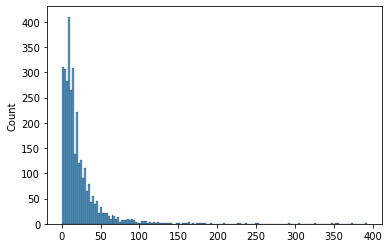

In [30]:
sns.histplot(len_sentences)

In [31]:
len_sentences = np.array(len_sentences)

In [32]:
len_sentences.mean()

22.935714285714287

As we can see that the WortTokenizer assigns the number according to the count of that word, higher the count lower the labels

> As we can see the count of word 'phone' is highest, hence its label will be lowest = 1.

#### Saving Tokenizer method into pickle so we can use it in prediction

In [33]:
# Make director to save this files
PATH_TO_SAVE_VECTORIZER = 'Vectorizer_pickle'
# os.mkdir('Vectorizer_pickle')

In [34]:
file = open('Vectorizer_pickle/Tokenizer.pkl', 'wb')
pickle.dump(tokenizer, file)

So we can export this Tokenizer so now let's re-import it into different variable 

In [35]:
file_ = open(PATH_TO_SAVE_VECTORIZER+'/Tokenizer.pkl', 'rb')
loaded_tokenizer = pickle.load(file_)

In [36]:
loaded_tokenizer.texts_to_sequences(x_train)[:5]

[[52, 28, 2, 1, 181, 220, 54, 2806, 850, 220, 388, 28, 14],
 [3, 211, 192, 142, 150, 182, 23, 2],
 [103, 464, 3, 464, 10, 464, 2807, 2, 1, 390],
 [1, 465, 62, 898, 195, 522, 16, 595, 504],
 [4, 40, 26, 559, 13, 76, 27]]

In [37]:
x_test

4242                                         nice product
3668    change issue wrap charge doesn t work take app...
1079    feel quality performance unbeatable s iphone s...
1350    phone good fast 90 hz display smooth camera aw...
4161    mobile good camara battery low weight manageme...
                              ...                        
5410    good video stop unfortunately multimedia exper...
3186    1 st oneplus phone battery backup need improve...
2433    m regular user samsung time switch brand like ...
2524      superb camera nice picture quality nice feature
3800    find nord 2 extremely capable device s run hea...
Name: lemmatized, Length: 1121, dtype: object

In [38]:
loaded_tokenizer.texts_to_sequences(x_test)

[[66, 28],
 [215, 11, 783, 10, 116, 6, 23, 93, 1939, 5, 199, 411, 100],
 [37, 7, 24, 9, 313, 2955, 520, 24, 80, 354, 1740, 663, 9, 9, 152, 309, 313],
 [1, 2, 12, 110, 94, 38, 64, 3, 52, 4, 29, 19, 165, 46, 284, 36, 16],
 [15, 2, 585, 4, 106, 453, 672, 232, 198, 585, 2386, 251],
 [19,
  1,
  7,
  752,
  59,
  6,
  20,
  2030,
  606,
  7,
  130,
  308,
  174,
  1021,
  313,
  403,
  18,
  5,
  9,
  4,
  19,
  50,
  19,
  54,
  320,
  1196,
  505,
  1,
  322,
  522,
  16,
  313],
 [4, 40, 12, 26, 48, 37, 17, 500, 26, 2206, 2040, 1455],
 [172, 3, 457, 4208, 164, 64, 1396, 1854, 1374, 531, 2990, 208, 3, 2],
 [2,
  8,
  18,
  5,
  2839,
  850,
  41,
  1,
  3401,
  9,
  109,
  1,
  42,
  98,
  131,
  346,
  18,
  2839,
  2,
  4,
  730,
  813,
  2031,
  4,
  25,
  672,
  59,
  82,
  76,
  45,
  26,
  3,
  14,
  26,
  525,
  26,
  129,
  9,
  2,
  353,
  1,
  177,
  26,
  93,
  358,
  129,
  96],
 [145, 2, 20, 1, 462, 126, 122, 121, 130, 102, 50, 3, 52, 184, 129, 1845, 358],
 [759, 319, 18, 5, 

Hence it is working file and absolute, so we can used this method also for creating united RNN models. we can see it from **words like "phone" and "good"**

### TextVectorizer layer

#### Default settings

In [39]:
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 150

In [40]:
text_vectorizer_encoder = TextVectorization(max_tokens= VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_vectorizer_encoder.adapt(x_train)

In [41]:
vocab_text_vectorizer = text_vectorizer_encoder.get_vocabulary()

In [42]:
len(vocab_text_vectorizer)

5600

In [43]:
text_vectorizer_encoder.get_weights()

[array([b'phone', b'good', b'camera', ..., b'84', b'83', b'82'],
       dtype=object)]

In [44]:
text_vectorizer_encoder.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None, None),
 'dtype': 'string',
 'max_tokens': 5600,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 150,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [45]:
vectorized_text = text_vectorizer_encoder(x_train)
vectorized_text

<tf.Tensor: shape=(3360, 150), dtype=int64, numpy=
array([[ 53,  29,   3, ...,   0,   0,   0],
       [  4, 213, 193, ...,   0,   0,   0],
       [106, 486,   4, ...,   0,   0,   0],
       ...,
       [ 20,   2, 236, ...,   0,   0,   0],
       [ 17,   2,   6, ...,   0,   0,   0],
       [ 66,   9,  17, ...,   0,   0,   0]], dtype=int64)>

In [46]:
x_train

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
3320                 battery drain time hardly 5 hour use
                              ...                        
1528    wrong seller responsible packaging charger doe...
2120    bad quality connectivity buy replace issue get...
1295    bad phone see don t buy phone phone restart au...
1708    buy phone 2 month hang issue 2 month not use h...
1706    purchase oneplus buy high expectation phone me...
Name: lemmatized, Length: 3360, dtype: object

As you can see the layers is first initialized with x_train and then if we feed other dataset or string, those will be handled according to **adapted dataset**.

Let's try by taking some strings from x_train and also with x_test

> **💀NOTE💀** In following example i am using ***x_train[1]***, it means that i am taking review having label as ***1***. you can cross check it from DataFrame. (i am so lucky that review having label 1 fall in training set 😅😅)

In [47]:
print(f'First string {x_train[1]}')  # We are taking because it contains word "phone"
first_review = x_train[1]

First string like tell win t give technical review like ytube video going to honest review general phone user like phone price 20 k think research lot buy confuse buy iphone 12 nord 2 know price difference win t 50 k buy phone iphone honestly man think 30 k 1 nord 2 astonishing don t need plus 9 high range phone plus extra buck pocket u wanna spend tell u pro con phone honestly 3 4 day vigorous usage pro 1 ultra premium feature price range 30 k pretty match feature higer range plus model 2 display great 3 screen refresh rate actually feel fast 0 hz 4 heating issue phone charger till 5 give cover phone pretty good actually bump camera portion actually save phone direct fall rough floor screen scratch cover s test guysand actually feel elegant need hectic work search cover buy phone infact scratch guard screen handy don t think u need temper guard u handle ur phone anyways s choice m going to scratch guard week month n let go week feel perform outstanding will not tell u feature phone u 

In [48]:
text_vectorizer_encoder(first_review)

<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([  18,  392,  243,    7,   78,  653,   61,   18, 2810,   57,  741,
        600,  612,   61,  778,    2,   70,   18,    2,   36,  107,   35,
         84,  811,   81,   17,  718,   17,  313,  149,   19,    6,  154,
         36,  422,  243,    7,  233,   35,   17,    2,  313,  938,  928,
         84,   40,   35,   23,   19,    6, 1422,   32,    7,   56,   21,
        132,  139,   71,    2,   21,  517, 1647,  585,  128, 1158,  468,
        392,  128,   85,  159,    2,  938,   22,   31,   15, 2936,   62,
         85,   23,  466,   99,   58,   36,   71,   40,   35,  173,  825,
         58, 4384,   71,   21,  308,    6,   39,   37,   22,   46,  210,
        153,  280,   38,   13,  188,   96,   31,   45,   12,    2,   75,
        208,   14,   78,  315,    2,  173,    3,  280, 2681,    4, 2256,
        280,  525,    2, 1034,  665, 1486, 4604,   46,  402,  315,   10,
        488, 4465,  280,   38, 1385,   56, 1573,   24,  808,  315,   17,
     

In [49]:
text_vectorizer_encoder('phone')

<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)>

As expected the **phone got the number 2 as encoding**, hence this method is based on the same method as Tokenizer. so **1 int may be assigned to ''** 

In [50]:
vectorized_text_array = np.array(vectorized_text)

In [51]:
vectorized_text_array[vectorized_text_array == 0] = 100000

In [52]:
print(x_train[3093])
print(text_vectorizer_encoder(x_train[3093]))

work perfect app porfermance smooth like butter camera good good battery charging fast
tf.Tensor(
[  24  202   26 3670   65   18  647    4    3    3    5  101   13    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], shape=(150,), dtype=int64)


In [53]:
np.where(vectorized_text_array.min(axis = 1) == 1)

(array([  35,  199,  374,  382,  592,  622,  645,  776,  831,  867, 1016,
        1067, 1142, 1188, 1197, 1266, 1379, 1460, 1506, 1529, 1536, 1683,
        1823, 2153, 2169, 2362, 2399, 2421, 2451, 2507, 2558, 2750, 2824,
        2932, 3036, 3228, 3261, 3337, 3354], dtype=int64),)

In [54]:
vectorized_text_array[1807]

array([     3,     29,    123,     54,     37,     58, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
      

In [55]:
vectorized_text_array.min(axis = 1)

array([2, 3, 2, ..., 2, 2, 2], dtype=int64)

In [56]:
print(list(x_train)[1807])
text_vectorizer_encoder(list(x_train)[1807])

good product value money great feature


<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([  3,  29, 123,  54,  37,  58,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int64)>

As we can see, ***1 label is attached to string "03"***

#### Custom Vectorization methods

We can change Vectorization methods here to CountVectorizer, TF-IDF, One-Hot, **Which is refered as *output_mode* in TextVectorization settings**
There are Following methods:

- **int**:  Outputs integer indices, one integer index per split string token. When output_mode == "int", 0 is reserved for masked locations; this reduces the vocab size to **max_tokens - 2 instead of max_tokens - 1**.

 
- **multi_hot**:  Outputs a single int array per batch, of either vocab_size or max_tokens size, containing 1s in all elements where the token mapped to that index exists at least once in the batch item.
 

- **count**:  Like "multi_hot", but the int array contains a count of the number of times the token at that index appeared in the batch item.

 
- **tf_idf**:  Like "multi_hot", but the TF-IDF algorithm is applied to find the value in each token slot. 
For "int" output, any shape of input and output is supported. For all other output modes, currently only rank 1 inputs (and rank 2 outputs after splitting) are supported. 

#### Multi-hot Method

In [57]:
text_vectorizer_encoder_onehot = TextVectorization(max_tokens= VOCAB_SIZE, output_mode= 'multi_hot')
text_vectorizer_encoder_onehot.adapt(x_train)

In [58]:
text_vectorizer_encoder_onehot.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'batch_input_shape': (None, None),
 'dtype': 'string',
 'max_tokens': 5600,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'multi_hot',
 'output_sequence_length': None,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [59]:
text_vectorizer_encoder_onehot.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

In [60]:
print(x_train[1])
print(text_vectorizer_encoder_onehot(x_train[1]))

like tell win t give technical review like ytube video going to honest review general phone user like phone price 20 k think research lot buy confuse buy iphone 12 nord 2 know price difference win t 50 k buy phone iphone honestly man think 30 k 1 nord 2 astonishing don t need plus 9 high range phone plus extra buck pocket u wanna spend tell u pro con phone honestly 3 4 day vigorous usage pro 1 ultra premium feature price range 30 k pretty match feature higer range plus model 2 display great 3 screen refresh rate actually feel fast 0 hz 4 heating issue phone charger till 5 give cover phone pretty good actually bump camera portion actually save phone direct fall rough floor screen scratch cover s test guysand actually feel elegant need hectic work search cover buy phone infact scratch guard screen handy don t think u need temper guard u handle ur phone anyways s choice m going to scratch guard week month n let go week feel perform outstanding will not tell u feature phone u read em speci

In [61]:
text_vectorizer_encoder_onehot.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

The one_hot encoding is in same order as vocabolary

#### CountVectorizer

In [62]:
text_vectorizer_encoder_count = TextVectorization(max_tokens=VOCAB_SIZE, output_mode='count')
text_vectorizer_encoder_count.adapt(x_train)

In [63]:
text_vectorizer_encoder_count.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

In [64]:
x_train[3093], x_train[1775], x_train[1273]

('work perfect app porfermance smooth like butter camera good good battery charging fast',
 'bad camera sony cam unbelievable bad fingerprint sensor slow good thing fast charge charge fastly',
 'watch youtube video enhance depth gadget specific knowledge require daily usage phone case minute detail visible human eye phone clearly meet expectation start camera battery screen performance s champ')

In [65]:
text_vectorizer_encoder_count(x_train)

<tf.Tensor: shape=(3360, 5600), dtype=float32, numpy=
array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

It is similar to countvectorizer in scikit-learn

## Tensorflow models

## RNN models

### RNN 1

In [67]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [69]:
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model = Sequential()
rnn_model.add(text_encoder)
rnn_model.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model.add(SimpleRNN(30))
rnn_model.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

rnn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [70]:
rnn_model.fit(x_train, y_train, epochs = 10,
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 98s 235ms/step - loss: 0.8541 - accuracy: 0.5813 - val_loss: 0.6911 - val_accuracy: 0.6967
Epoch 2/10
105/105 [==============================] - 31s 298ms/step - loss: 0.6547 - accuracy: 0.7149 - val_loss: 0.9598 - val_accuracy: 0.6164
Epoch 3/10
105/105 [==============================] - 26s 251ms/step - loss: 0.4685 - accuracy: 0.8155 - val_loss: 0.7560 - val_accuracy: 0.6985
Epoch 4/10
105/105 [==============================] - 21s 199ms/step - loss: 0.3155 - accuracy: 0.8798 - val_loss: 0.9279 - val_accuracy: 0.6690
Epoch 5/10
105/105 [==============================] - 24s 225ms/step - loss: 0.1982 - accuracy: 0.9360 - val_loss: 0.8934 - val_accuracy: 0.6726
Epoch 6/10
105/105 [==============================] - 26s 252ms/step - loss: 0.1201 - accuracy: 0.9574 - val_loss: 0.9868 - val_accuracy: 0.7199
Epoch 7/10
105/105 [==============================] - 25s 234ms/step - loss: 0.0718 - accuracy: 0.9756 - val_loss: 1.1980 - val_ac

In [76]:
get_prediction('Good phone', rnn_model)

1

In [77]:
get_prediction('Best phone', rnn_model)

2

In [78]:
get_prediction('bad phone', rnn_model)

0

In [79]:
D = 'i love this mobile phone. its camera is good, battery backup is good but i found some problem in handling'
get_prediction(D, rnn_model)

2

In [80]:
D = 'i hate this mobile, screen is not working, camera is worst'
get_prediction(D, rnn_model)

0